In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
wine = datasets.load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = pd.Series(wine.target)
wine_df["X0"] = 1
display(wine_df)
print("Target Values:", wine_df.target.unique())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,X0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,1


Target Values: [0 1 2]


In [ ]:
features = [f for f in wine_df.columns if f != 'target']
label_name = ['Y0', 'Y1', 'Y2']
label = [0, 1, 2]
print('Features:', features)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'X0']


In [ ]:
def createY(train_Y, label):
  arr = np.array(train_Y)
  for i in range(len(arr)):
    arr[i] = 1 if arr[i] == label else 0
  return arr

In [ ]:
def oneHotEncoding(df, label_name, label):
  for i in range(len(label)):
    df[label_name[i]] = pd.Series(createY(df['target'], label[i]))

In [ ]:
def predict(weight, sample):
    return 1 / (1 + np.exp(-1 * np.sum(np.multiply(weight, sample))))

In [ ]:
def singleLayerPerceptron(train_X, train_Y, alpha, rho, max_epoch, validation_X = None, validation_Y = None):
    m = len(train_X)
    m_validation = len(validation_X)
    no_of_features = len(train_X[0])
    no_of_class = len(train_Y[0])

    weights = np.zeros((no_of_class, no_of_features))
    curr_loss = prev_loss = float("inf")
    hX = np.zeros(no_of_class)
    loss = []
    epoch = 0
    validation_loss = 0
    validation_loss_list = []
    for _ in range(max_epoch):
        epoch += 1
        enum = np.arange(m)
        np.random.shuffle(enum)
        curr_loss = 0
        validation_loss = 0
        for i in enum:
            # predict values
            for j in range(no_of_class):
                hX[j] = predict(weights[j], train_X[i])
            # error calc
            curr_loss += np.sum(np.square(hX - train_Y[i])) / 2
            
            # weight updation
            for j in range(no_of_class):
                for k in range(no_of_features):
                    weights[j][k] += alpha * (train_Y[i][j] - hX[j]) * train_X[i][k] * hX[j] * (1 - hX[j])

        for i in range(m_validation):
            # predict values
            for j in range(no_of_class):
                hX[j] = predict(weights[j], validation_X[i])
            # error calc
            validation_loss += np.sum(np.square(hX - validation_Y[i])) / 2

        loss.append(curr_loss)
        validation_loss_list.append(validation_loss)

        # print("Epoch:", epoch, "\tLoss:", curr_loss)
        if abs(curr_loss - prev_loss) < rho:
            break
        prev_loss = curr_loss
    print("No. of Epoch:", epoch, "\tLoss:", curr_loss)
    plt.plot(np.arange(epoch), loss)
    plt.plot(np.arange(epoch), validation_loss_list)

    plt.show()
    return weights

In [ ]:
def predictClass(model, val_X):
    predicted = np.zeros(len(val_X), dtype=np.int8)
    for i in range(len(val_X)):
        prob = np.array([predict(weight, val_X[i]) for weight in model])
        predicted[i] = np.argmax(prob)
        # print(prob)
    return predicted

In [ ]:
def accuracy(predicted, val_Y):
  return 1 - (np.count_nonzero(np.subtract(predicted, val_Y)) / len(val_Y))

In [ ]:
def precision(predicted, val_Y, label):
    true = 0
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == label and val_Y[i] == label:
            true += 1
        if predicted[i] == label:
            total += 1
    if total == 0:
        return 0
    else:
        return true/total

In [ ]:
def recall(predicted, val_Y, label):
    true = 0
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == label and val_Y[i] == label:
            true += 1
        if val_Y[i] == label:
            total += 1
    if total == 0:
        return 0
    else:
        return true/total

In [ ]:
def printMetrics(model, test_X, actual):
    predicted = predictClass(model, test_X)
    # print(predicted)
    print("\nOverAll Accuracy: {:.2%}".format(accuracy(predicted, actual)))
    for i in range(3):
        print("Precision for class {}: {:.2%}".format(i, precision(predicted, actual, i)))
    print()
    for i in range(3):
        print("Recall for class {}: {:.2%}".format(i, recall(predicted, actual, i)))

In [ ]:
oneHotEncoding(wine_df, label_name, label)
display(wine_df) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,X0,Y0,Y1,Y2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,1,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,1,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,1,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,1,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,1,0,0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,1,0,0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,1,0,0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,1,0,0,1


In [ ]:
wine_df = wine_df.sample(frac=1)

norm = MinMaxScaler()
norm_fit = norm.fit(wine_df[features])
wine_X = norm_fit.transform(wine_df[features])

wine_Y = np.array(wine_df[label_name])
wine_label = np.array(wine_df['target'])
print(len(wine_Y))
print(len(wine_label))
print(len(wine_X))



178
178
178


In [ ]:
wine_X, wine_X_validation, wine_label, wine_label_validation, wine_Y, wine_Y_validation = train_test_split(wine_X, wine_Y, wine_label, test_size=0.1, random_state=42)

In [ ]:
print(wine_Y)

[1 2 0 2 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 2 1 2 0 2 2 1 0 1 1 1 0 0 1 1
 1 0 1 1 2 0 0 1 1 2 1 0 2 1 2 0 2 0 2 2 2 0 1 0 0 0 1 2 2 0 1 1 1 2 1 1 0
 2 0 0 0 1 0 0 1 0 0 2 2 1 0 2 2 1 0 1 1 2 2 0 1 2 0 2 2 1 1 1 2 0 1 0 0 2
 1 0 2 2 1 1 1 2 2 2 1 0 0 1 2 2 0 1 2 1 0 2 1 1 0 0 0 2 1 1 1 2 1 1 1 0 1
 2 2 2 0 0 0 0 2 0 1 1 1]


No. of Epoch: 1000 	Loss: 0.46078280659529164


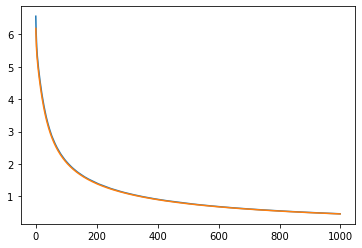

In [ ]:
alpha = 0.1
rho = 1e-6
max_epoch = 1000

model = singleLayerPerceptron(wine_X_validation, wine_label_validation, alpha, rho, max_epoch, wine_X_validation, wine_label_validation)

No. of Epoch: 10000 	Loss: 0.4595767697341869


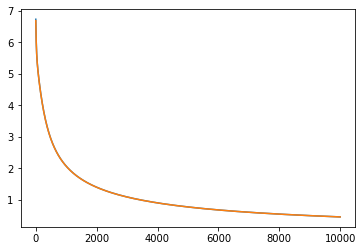

In [ ]:
alpha = 0.01
rho = 1e-6
max_epoch = 10000

model = singleLayerPerceptron(wine_X_validation, wine_label_validation, alpha, rho, max_epoch, wine_X_validation, wine_label_validation)

No. of Epoch: 12192 	Loss: 0.012422771963125401


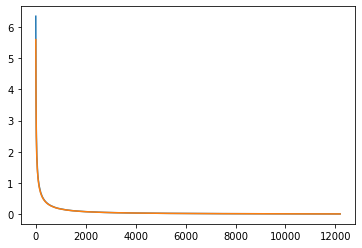

In [ ]:
alpha = 0.3
rho = 1e-6
max_epoch = 100000

model = singleLayerPerceptron(wine_X_validation, wine_label_validation, alpha, rho, max_epoch, wine_X_validation, wine_label_validation)

Fold:  1
No. of Epoch: 959 	Loss: 1.867444472301158


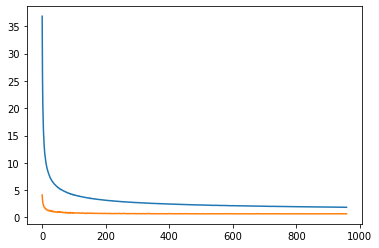


OverAll Accuracy: 93.75%
Precision for class 0: 83.33%
Precision for class 1: 100.00%
Precision for class 2: 100.00%

Recall for class 0: 100.00%
Recall for class 1: 93.75%
Recall for class 2: 83.33%

Fold:  2
No. of Epoch: 1812 	Loss: 1.6895619946687002


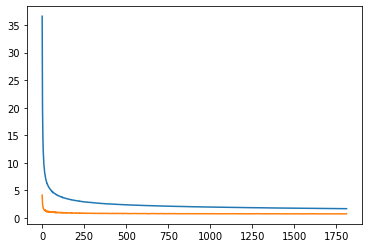


OverAll Accuracy: 100.00%
Precision for class 0: 100.00%
Precision for class 1: 100.00%
Precision for class 2: 100.00%

Recall for class 0: 100.00%
Recall for class 1: 100.00%
Recall for class 2: 100.00%

Fold:  3
No. of Epoch: 1374 	Loss: 1.1689072402603686


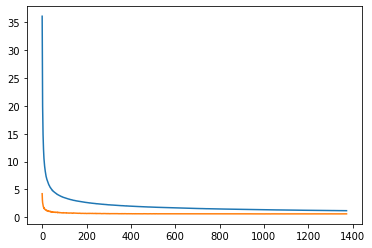


OverAll Accuracy: 96.88%
Precision for class 0: 100.00%
Precision for class 1: 100.00%
Precision for class 2: 90.91%

Recall for class 0: 100.00%
Recall for class 1: 90.91%
Recall for class 2: 100.00%

Fold:  4
No. of Epoch: 5458 	Loss: 0.4377228121346674


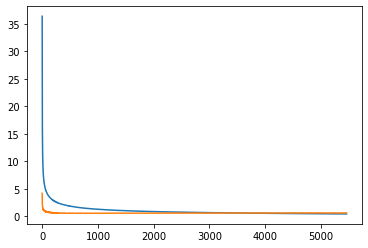


OverAll Accuracy: 96.88%
Precision for class 0: 100.00%
Precision for class 1: 91.67%
Precision for class 2: 100.00%

Recall for class 0: 88.89%
Recall for class 1: 100.00%
Recall for class 2: 100.00%

Fold:  5
No. of Epoch: 2159 	Loss: 0.9520782076800368


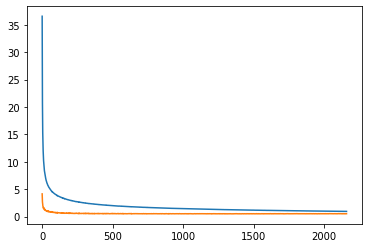


OverAll Accuracy: 93.75%
Precision for class 0: 83.33%
Precision for class 1: 100.00%
Precision for class 2: 100.00%

Recall for class 0: 100.00%
Recall for class 1: 85.71%
Recall for class 2: 100.00%



In [ ]:
kf = KFold(n_splits=5)

alpha = 0.3
rho = 1e-6
max_epoch = 100000

fold = 0
for train_index, test_index in kf.split(wine_X):
    fold += 1
    print("Fold: ", fold)
    
    X_train, X_test = wine_X[train_index], wine_X[test_index]
    y_train, y_test = wine_Y[train_index], wine_Y[test_index]
    label_train, label_test = wine_label[train_index], wine_label[test_index]

    model = singleLayerPerceptron(X_train, label_train, alpha, rho, max_epoch, wine_X_validation, wine_label_validation)
    printMetrics(model, X_test, y_test)
    print()